In [1]:
%run Data_Preprocessing.ipynb

0.23.1


In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df_new=sample_data()
trX,teX,trY,teY=make_test_train(df_new)

## SVM model using linear kernel

In [57]:
clf=LinearSVC(dual=False,tol=1e-5,C=1000,verbose=2,random_state=random_state)
clf.fit(trX,trY)

[LibLinear]

LinearSVC(C=1000, dual=False, random_state=42, tol=1e-05, verbose=2)

In [58]:
w=clf.coef_
b=clf.intercept_[0]

In [59]:
w

array([[-3.36512018e-01,  1.41450445e-01, -3.05596592e-02,
         1.17774582e-03, -2.18830455e-02,  6.57698693e-02,
         9.61252486e+00,  6.52474495e+00,  2.92224915e+01]])

In [60]:
b

-3.672262477451565

1. Since SVM does not have traditional ROC curve, I use confusion matrix instead

In [36]:
#accuarcy using score
clf.score(trX,trY)

0.8806479113384484

In [37]:
#test set accuracy
clf.score(teX,teY)

0.8849206349206349

In [38]:
mat=confusion_matrix(teY,clf.predict(teX))
mat

array([[230,  33],
       [ 25, 216]], dtype=int64)

## SVM Linear Kernel with scaling 

In [61]:
clf=make_pipeline(StandardScaler(),LinearSVC(dual=False,tol=1e-5,C=1000,verbose=2,random_state=random_state))
clf.fit(trX,trY)

[LibLinear]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=1000, dual=False, random_state=42, tol=1e-05,
                           verbose=2))])

In [62]:
clf.score(trX,trY)

0.8797953964194374

In [63]:
clf.score(teX,teY)

0.8809523809523809

In [64]:
mat=confusion_matrix(teY,clf.predict(teX))
mat

array([[229,  34],
       [ 26, 215]], dtype=int64)

In [65]:
w=clf.named_steps['linearsvc'].coef_
w

array([[-0.8609111 ,  0.40730505, -0.27226847,  0.01947727, -0.17197968,
         0.1490359 ,  0.17802885,  0.09950174,  0.51993155]])

In [66]:
b=clf.named_steps['linearsvc'].intercept_
b

array([-0.0160789])

In [73]:
w

array([[-0.8609111 ,  0.40730505, -0.27226847,  0.01947727, -0.17197968,
         0.1490359 ,  0.17802885,  0.09950174,  0.51993155]])

### plot feature importance

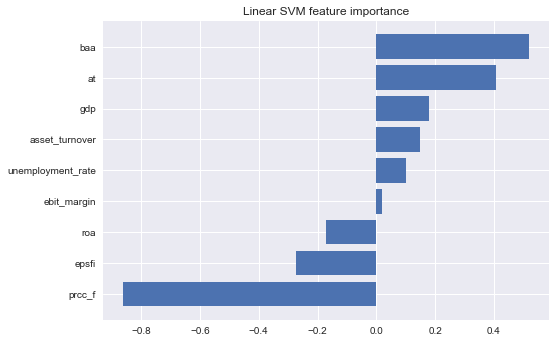

In [78]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('Linear SVM feature importance')
    plt.show()

features_names = trX.columns.tolist()
f_importances(w.ravel(), features_names)

Text(0.5, 1.0, 'prcc_f line')

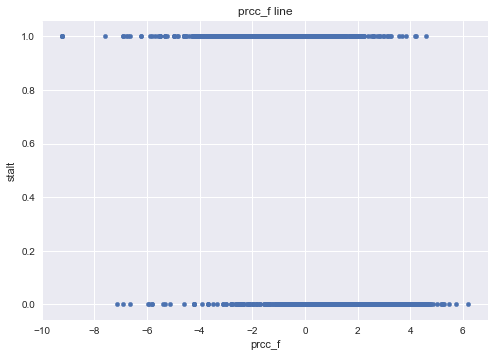

In [92]:
df_new.plot(x='prcc_f',y='stalt',kind='scatter')
plt.title('prcc_f line')

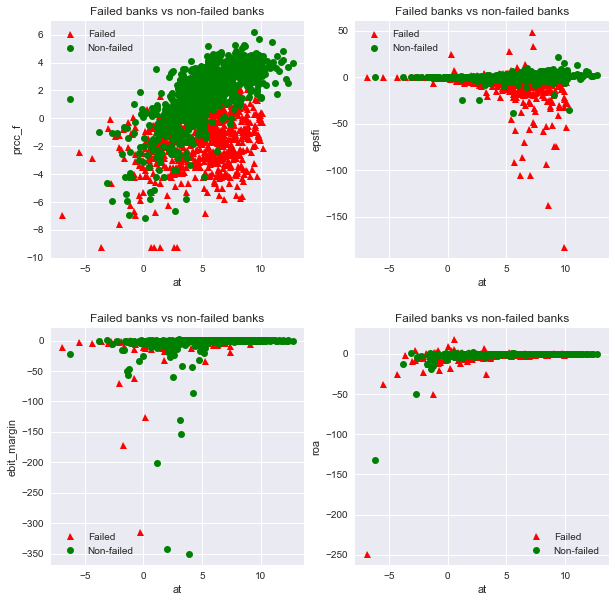

In [102]:
first_indx = [1, 1, 1, 1]
second_indx = [0, 2, 3, 4]

X_train = df_new[columns_selected].values
y_train = df_new.stalt.values # .reshape(-1,1)

num_plots = 4
if num_plots % 2 == 0:
    f, axs = plt.subplots(num_plots // 2, 2)
else:
    f, axs = plt.subplots(num_plots// 2 + 1, 2)
    
f.subplots_adjust(hspace=.3)

f.set_figheight(10.0)
f.set_figwidth(10.0)
    
for i in range(num_plots):
    if i % 2 == 0:
        first_idx = i // 2
        second_idx = 0
    else:
        first_idx = i // 2
        second_idx = 1
        
    axs[first_idx,second_idx].plot(X_train[y_train == 1.0, first_indx[i]], 
                                   X_train[y_train == 1.0, second_indx[i]], 'r^', label="Failed")
    axs[first_idx,second_idx].plot(X_train[y_train == 0.0, first_indx[i]], 
                                   X_train[y_train == 0.0, second_indx[i]], 'go',label="Non-failed") 
    
    axs[first_idx, second_idx].legend()
    axs[first_idx, second_idx].set_xlabel('%s' % columns_selected[first_indx[i]])
    axs[first_idx, second_idx].set_ylabel('%s' % columns_selected[second_indx[i]])
    axs[first_idx, second_idx].set_title('Failed banks vs non-failed banks')
    axs[first_idx, second_idx].grid(True)
    
if num_plots % 2 != 0:
    f.delaxes(axs[i // 2, 1])

## SVM using other kernels

In [4]:
from sklearn.svm import SVC
clf=SVC(C=1000,kernel='linear').fit(trX,trY)

In [5]:
clf.score(trX,trY)

0.8840579710144928

In [6]:
clf.score(teX,teY)

0.8829365079365079